In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("6-Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


---

# DATA İNCELEME

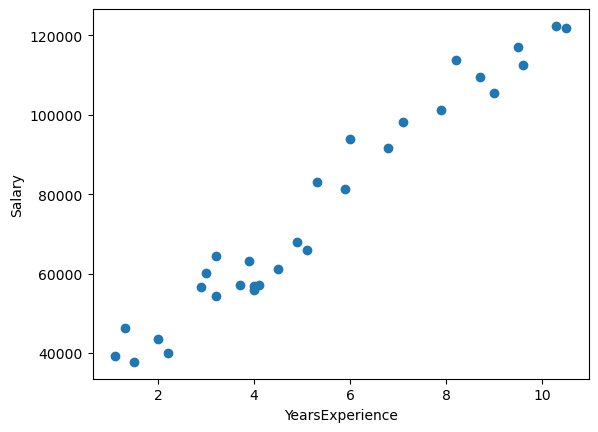

In [6]:
plt.scatter(df["YearsExperience"], df["Salary"])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

---
# TEST - TRAIN SPLIT

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[["YearsExperience"]]
y = df[["Salary"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

In [10]:
X_train.shape

(24, 1)

In [11]:
X_test.shape

(6, 1)

---
# STANDARTLAŞTIRMA İŞLEMİ

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train

array([[-1.27214822],
       [-1.20369182],
       [ 1.87684648],
       [-0.69026877],
       [-1.0325508 ],
       [ 1.53456445],
       [ 1.36342343],
       [-0.45067134],
       [-0.96409439],
       [ 0.61040296],
       [-0.38221494],
       [ 1.26073882],
       [-0.31375853],
       [ 0.09697991],
       [-0.0399329 ],
       [ 1.80839008],
       [-0.34798673],
       [-0.62181236],
       [-1.34060463],
       [ 1.08959781],
       [-0.72449697],
       [-0.34798673],
       [ 0.71308757],
       [-0.62181236]])

---
# MODEL EĞİTİMİ

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regression = LinearRegression()

In [18]:
regression.fit(X_train, y_train)

LinearRegression()

In [19]:
regression.coef_

array([[27625.08280112]])

In [20]:
regression.intercept_

array([73487.91666667])

In [21]:
# denklem y = 73487.91 + 27625.08x

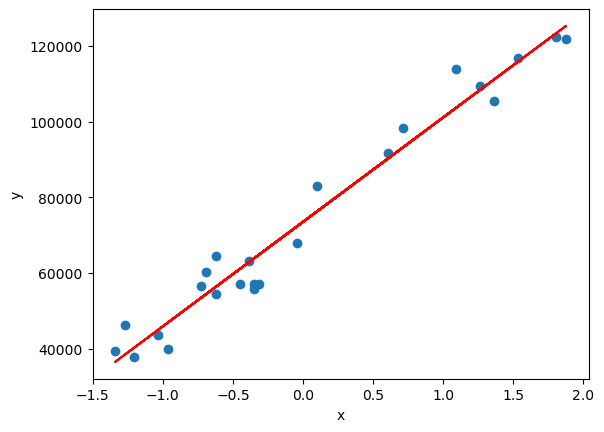

In [22]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train), "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

---
# MODEL BAŞARISI

In [24]:
y_pred_test = regression.predict(X_test)

In [25]:
y_test

,Salary
16,66029
14,61111
27,112635
22,101302
19,93940
18,81363


In [26]:
from sklearn.metrics import r2_score

In [27]:
r2 = r2_score(y_test, y_pred_test)

In [28]:
r2

0.869701243381722